In [2]:
!pip install --user tensorflow pandas matplotlib scikit-learn

In [3]:
!pip install --upgrade numpy

In [4]:
!pip install --user pandas

In [5]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [6]:
os.path.join('train.csv')

'train.csv'

In [7]:
df= pd.read_csv(os.path.join('train.csv'))

In [8]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [9]:
df.iloc[50]['comment_text']

'"\n\nBI, you said you wanted to talk\n\nAt the bottom of the lead section you have written:\n\n""Its promoter speculated in 1994 that the skyhook concept could be cost competitive with what is realistically thought to be achievable using a space elevator, but the skyhook is not competitive with other rotating tether concepts. In addition, the rotating skyhook is in fact deemed ""not engineeringly feasible using presently available materials"".""\n\nRegarding:  In addition, the rotating skyhook is in fact deemed ""not engineeringly feasible using presently available materials""\n\nThat statement appears to come from Ref [3] on page 10.  The full quote is\n\n""If the mass of the tether alone started to exceed 200 times the mass of the payload,\nthen that was an indication the particular scenario being considered was not engineeringly\nfeasible using presently available materials, although the application might become feasible in\nthe near future as better materials become available with

# PREPROCESS

In [10]:
from tensorflow.keras.layers import TextVectorization

In [11]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [12]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [13]:
MAX_FEATURES = 200000

In [14]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                              output_sequence_length=1800,
                              output_mode='int')

In [24]:
vectorizer.adapt(X.values)

In [25]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [26]:
vectorized_text = vectorizer(X.values)

In [27]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [28]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text,y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [29]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [30]:
train = dataset.take(int(len(dataset)*7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [31]:
train_generator = train.as_numpy_iterator()

In [32]:
train_generator.next()

(array([[    10,      9,    679, ...,      0,      0,      0],
        [   124,      7,     90, ...,      0,      0,      0],
        [   387,   1113,     81, ...,      0,      0,      0],
        ...,
        [   243,     65,     24, ...,      0,      0,      0],
        [  6241, 139933,   1058, ...,      0,      0,      0],
        [  1048,   1859,     34, ...,      0,      0,      0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

2. Create sequential model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [34]:
model = Sequential()
model.add(Embedding(MAX_FEATURES+1,32))
model.add(Bidirectional(LSTM(32,activation='tanh')))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

In [35]:
model.compile(loss='BinaryCrossentropy',optimizer='Adam')

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [37]:
history = model.fit(train, epochs=1, validation_data=val)

9974/9974 [==============================] - 6693s 671ms/step - loss: 0.0586 - val_loss: 0.0453


In [38]:
history.history

{'loss': [0.058560341596603394], 'val_loss': [0.04525917395949364]}

In [39]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

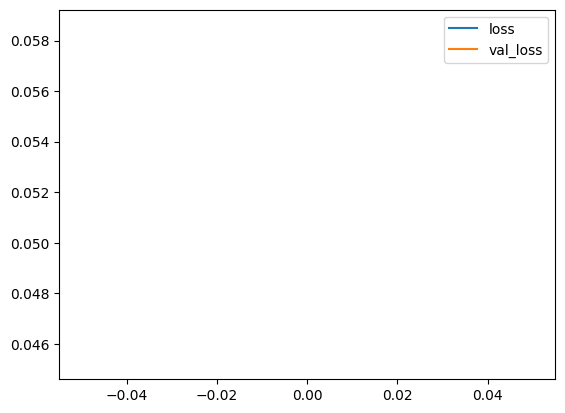

In [40]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

3. Make Predictions

In [41]:
input_text = vectorizer('You freaking sick! I am going to hit you.')

In [42]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [43]:
batch = test.as_numpy_iterator().next()

In [44]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [45]:
(model.predict(batch_X) > 0.5).astype(int) 

1/1 [==============================] - 1s 829ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [46]:
res = model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 0s 108ms/step


4. EVALUATE MODEL

In [47]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [48]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [49]:
for batch in test.as_numpy_iterator():
    X_true, y_true = batch
    yhat = model.predict(X_true)
    
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 122ms/step


1/1 [==============================] - 0s 121ms/step


1/1 [==============================] - 0s 128ms/step


1/1 [==============================] - 0s 119ms/step


1/1 [==============================] - 0s 120ms/step


1/1 [==============================] - 0s 121ms/step


1/1 [==============================] - 0s 121ms/step


In [50]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.8744502067565918, Recall: 0.6112353205680847, Accuracy:0.5075225830078125


4.TEST AND GRADIO

In [51]:
!pip install --upgrade gradio

   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/12.3 MB 787.7 kB/s eta 0:00:16
   ---------------------------------------- 0.1/12.3 MB 1.2 MB/s eta 0:00:10
    --------------------------------------- 0.2/12.3 MB 1.4 MB/s eta 0:00:09
   - -------------------------------------- 0.3/12.3 MB 1.5 MB/s eta 0:00:09
   - -------------------------------------- 0.4/12.3 MB 1.6 MB/s eta 0:00:08
   - -------------------------------------- 0.4/12.3 MB 1.6 MB/s eta 0:00:08
   - -------------------------------------- 0.4/12.3 MB 1.6 MB/s eta 0:00:08
   - -------------------------------------- 0.5/12.3 MB 1.2 MB/s eta 0:00:10
   - -------------------------------------- 0.6/12.3 MB 1.3 MB/s eta 0:00:10
   -- ------------------------------------- 0.6/12.3 MB 1.3 MB/s eta 0:00:09
   -- ------------------------------------- 0.6/12.3 MB 1.3 MB/s eta 0:00:09
   -- -----

In [52]:
import gradio as gr
import tensorflow as tf

In [53]:
model.save('toxicity.h5')

C:\Users\Sagnik\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [54]:
model = tf.keras.models.load_model('toxicity.h5')

In [55]:
input_str = vectorizer('hey i freakin hate you!')

In [56]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 1s 880ms/step


In [57]:
res

array([[0.69802827, 0.01401026, 0.28717184, 0.03712615, 0.29417092,
        0.05689207]], dtype=float32)

In [58]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text =''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
        
    return text

In [59]:
interface = gr.Interface(fn=score_comment,
                          inputs=gr.Textbox(lines=2, placeholder='Comment to score'),
                          outputs='text')

In [60]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


1/1 [==============================] - 0s 126ms/step
